In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.datasets import load_diabetes

In [3]:
dataset=load_diabetes()

In [4]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
X=df_diabetes
y=dataset['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [9]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

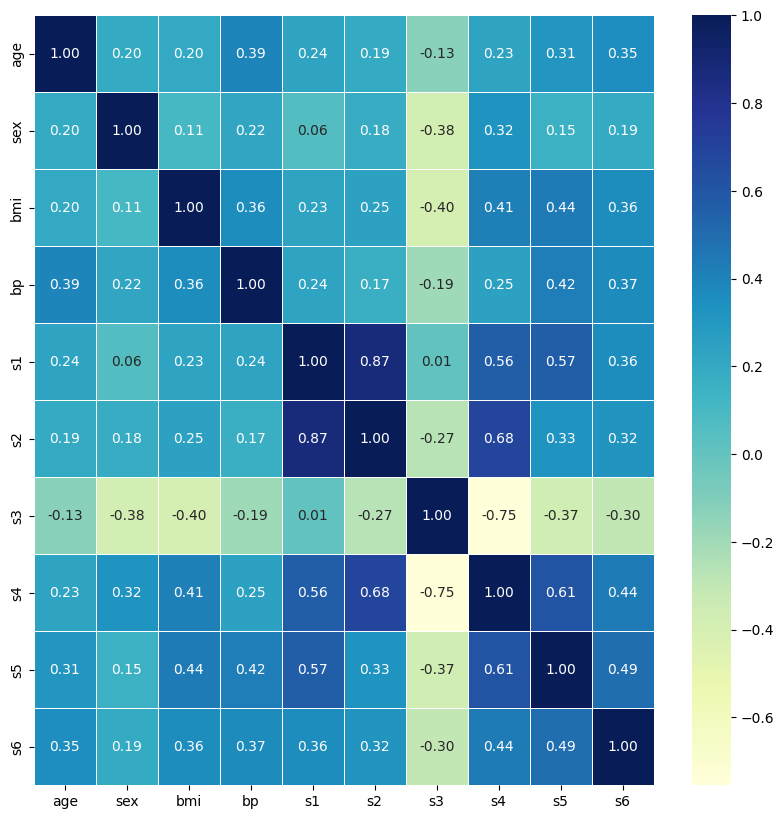

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

In [11]:
from sklearn.tree import DecisionTreeRegressor
treemodel=DecisionTreeRegressor()
treemodel.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
##Hyperparameter Tuning
param={'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
       'splitter':['best','random'],
       'max_depth':[2,3,4,5,6,7,8,9,10],
       'max_features':['auto','sqrt','log2'],}

In [13]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(treemodel,param,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

In [14]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [2, 3, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'poisson'


In [15]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [16]:
y_pred=grid.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 53.879632753622765
MSE: 4587.478223084127
RMSE: 67.73092516040312


[Text(0.5, 0.875, 'x[7] <= -0.013\npoisson = 18.919\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[8] <= -0.019\npoisson = 13.162\nsamples = 115\nvalue = 110.07'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= 0.025\npoisson = 10.23\nsamples = 77\nvalue = 95.481'),
 Text(0.0625, 0.125, 'poisson = 13.989\nsamples = 33\nvalue = 106.667'),
 Text(0.1875, 0.125, 'poisson = 6.558\nsamples = 44\nvalue = 87.091'),
 Text(0.375, 0.375, 'x[5] <= -0.024\npoisson = 13.396\nsamples = 38\nvalue = 139.632'),
 Text(0.3125, 0.125, 'poisson = 10.377\nsamples = 22\nvalue = 171.455'),
 Text(0.4375, 0.125, 'poisson = 5.191\nsamples = 16\nvalue = 95.875'),
 Text(0.75, 0.625, 'x[9] <= 0.03\npoisson = 16.427\nsamples = 194\nvalue = 178.031'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 0.0\npoisson = 15.191\nsamples = 127\nvalue = 157.496'),
 Text(0.5625, 0.125, 'poisson = 11.897\nsamples = 60\nvalue = 122.45'),
 Text(0.6875, 0.125, 'poisson = 11.419\nsamples = 67\nvalue 

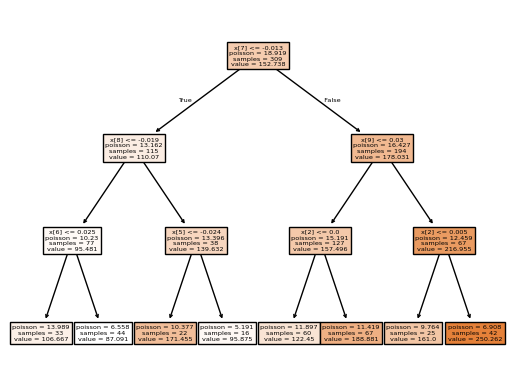

In [22]:
from sklearn import tree
tree.plot_tree(grid.best_estimator_,filled=True)

In [23]:
grid.best_estimator_

,criterion,'poisson'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0
